# Random Forest Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

## Importing the dataset

In [ ]:
dataset = pd.read_csv('WF_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(f"Total rows: {len(dataset)}")
print(X)

Total rows: 49640
[[ 1.    1.    2.   ...  0.   10.   -4.87]
 [ 1.    1.    2.   ...  0.    9.88 -4.87]
 [ 1.    1.    2.   ...  0.    9.88 -5.  ]
 ...
 [10.    1.    5.   ...  0.    0.03  5.  ]
 [10.    1.    5.   ...  0.    0.01  5.  ]
 [10.    1.    5.   ...  0.    0.    5.  ]]


## Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
start_train = time.time()
regressor.fit(X_train, y_train)
end_train = time.time()

## Predicting the Test set results

In [ ]:
start_pred = time.time()
y_pred = regressor.predict(X_test)
end_pred = time.time()

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.36 0.36]
 [0.41 0.41]
 [0.2  0.2 ]
 ...
 [0.74 0.78]
 [0.34 0.34]
 [0.12 0.12]]


## Plot

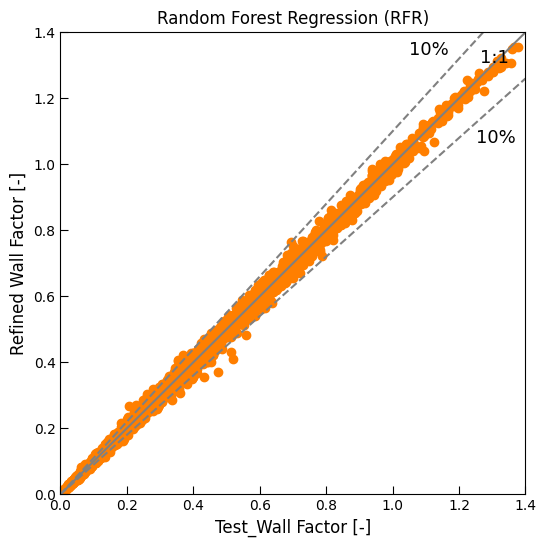

In [ ]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#FF7F00'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_test, y_pred, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("Test_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("Random Forest Regression (RFR)", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

## Predicting a new result

In [ ]:
row1 = [1., 10., 5., 0.1, 0., 9.5,	-4.8659]
X_t = np.array([row1])
print(X_t)

regressor.predict(X_t)

[[ 1.   10.    5.    0.1   0.    9.5  -4.87]]


array([0.51])

## ML models metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9987134230424912
Root Mean Squared Error (RMSE): 0.008978014459987301
Mean Squared Error: 8.060474364374108e-05
Mean Absolute Error (MAE): 0.005301153057574536


In [ ]:
import time

# Measure training time
training_time = end_train - start_train

# Measure prediction time
prediction_time = end_pred - start_pred

print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 1.04174 seconds
Prediction Time: 0.04631 seconds


## Computational resource

In [ ]:
import os
import torch
import psutil
import tensorflow as tf

# Check CPU Information
cpu_count = os.cpu_count()
cpu_freq = psutil.cpu_freq()
cpu_usage = psutil.cpu_percent(interval=1)

# Check Memory Information
mem_info = psutil.virtual_memory()
total_memory = mem_info.total / (1024 ** 3)  # Convert to GB
available_memory = mem_info.available / (1024 ** 3)  # Convert to GB

# Check GPU Availability
gpu_available = torch.cuda.is_available()
gpu_name = torch.cuda.get_device_name(0) if gpu_available else "No GPU detected"

# Print System Information
print("="*40)
print("System Information Summary")
print("="*40)
print(f"Number of CPUs       : {cpu_count}")
print(f"CPU Max Frequency    : {cpu_freq.max:.2f} MHz")
print(f"CPU Usage            : {cpu_usage}%")
print(f"Total Memory         : {total_memory:.2f} GB")
print(f"Available Memory     : {available_memory:.2f} GB")
print(f"GPU Available        : {'Yes' if gpu_available else 'No'}")
print(f"GPU Name             : {gpu_name}")

# Additional System Details
print("\nDetailed CPU Info:")
os.system("cat /proc/cpuinfo | grep 'model name' | uniq")

print("\nDetailed Memory Info:")
os.system("cat /proc/meminfo | grep 'MemTotal'")

if gpu_available:
    print("\nDetailed GPU Info:")
    os.system("nvidia-smi")  # Works only if NVIDIA GPU is available

System Information Summary
Number of CPUs       : 2
CPU Max Frequency    : 0.00 MHz
CPU Usage            : 63.0%
Total Memory         : 12.67 GB
Available Memory     : 10.62 GB
GPU Available        : No
GPU Name             : No GPU detected

Detailed CPU Info:

Detailed Memory Info:


## Vancouver Building WF

##Import Exp_data

In [ ]:
dataset = pd.read_csv('VB_EXP.csv')
X_VB = dataset.iloc[:, :-1].values
y_VB = dataset.iloc[:, -1].values

##WF_VB prediction

In [ ]:
start_pred_VB = time.time()
y_pred_VB = regressor.predict(X_VB)
end_pred_VB = time.time()

##Plot _ VB

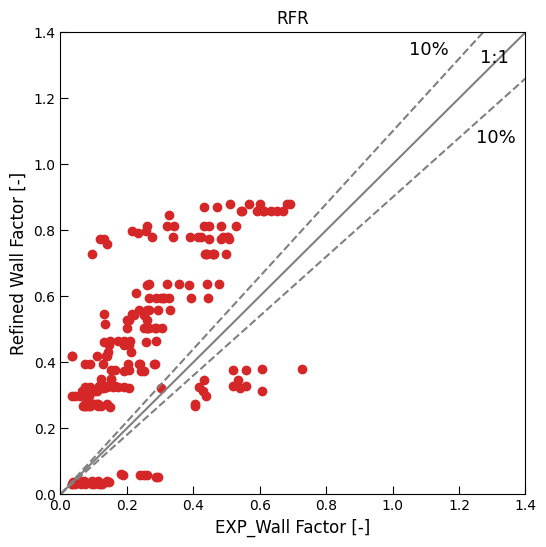

In [ ]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_VB, y_pred_VB, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("RFR", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

##ML models metrics


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_VB, y_pred_VB)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_VB, y_pred_VB))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_VB, y_pred_VB)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_VB, y_pred_VB)
print(f"Mean Absolute Error (MAE): {mae}")

############################

# Flatten WF_EXP to 1D
y_VB = y_VB.flatten()

# Calculate individual errors
individual_errors = (np.abs(y_pred_VB - y_VB) / y_VB) * 100
average_error = np.mean(individual_errors)

print("y_VB (first 5):", y_VB[:5])
print("y_pred_VB (first 5):", y_pred_VB[:5])
print("Individual Errors (first 5, %):", individual_errors[:5])
print(f"Average Error: {average_error:.2f}%")



R-squared (R²): -1.530523942435381
Root Mean Squared Error (RMSE): 0.2727929426737533
Mean Squared Error: 0.07441598957260566
Mean Absolute Error (MAE): 0.24375674924873095
y_VB (first 5): [0.6  0.32 0.15 0.43 0.32]
y_pred_VB (first 5): [0.88 0.64 0.46 0.31 0.81]
Individual Errors (first 5, %): [ 46.57  98.   208.79  27.1  153.28]
Average Error: 136.74%


In [ ]:
import time


# Measure VB prediction time
prediction_time_VB = end_pred_VB - start_pred_VB

print(f"Prediction Time_VB: {prediction_time_VB:.5f} seconds")

Prediction Time_VB: 0.00367 seconds


##Import and plot EXP vs. ISO

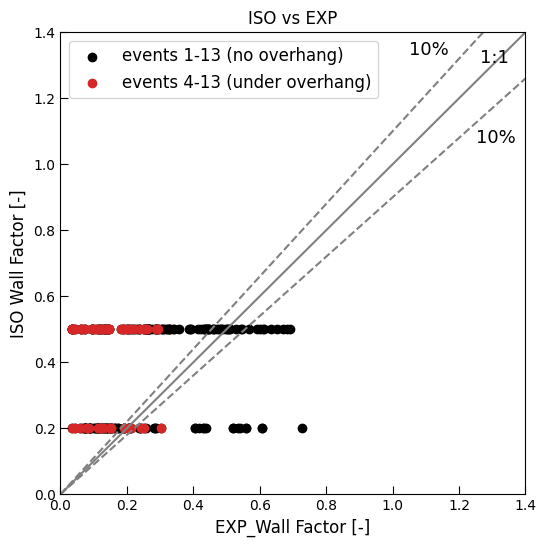

In [ ]:
dataset = pd.read_csv('VB_EXP_ISO_O.csv')
WF_EXP_O = dataset.iloc[:, :-1].values
WF_ISO_O = dataset.iloc[:, -1].values

dataset = pd.read_csv('VB_EXP_ISO.csv')
WF_EXP = dataset.iloc[:, :-1].values
WF_ISO = dataset.iloc[:, -1].values

import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(WF_EXP, WF_ISO, color='k', marker='o', label='events 1-13 (no overhang)')
plt.scatter(WF_EXP_O, WF_ISO_O, color=strong_orange, marker='o', label='events 4-13 (under overhang)')


# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("ISO Wall Factor [-]", fontsize=12)
plt.title("ISO vs EXP", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

# Add legend
plt.legend(loc='upper left', fontsize=12)

plt.show()


## ISO metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(WF_EXP, WF_ISO)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(WF_EXP, WF_ISO))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(WF_EXP, WF_ISO)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(WF_EXP, WF_ISO)
print(f"Mean Absolute Error (MAE): {mae}")



###############

# Flatten WF_EXP to 1D
WF_EXP = WF_EXP.flatten()

# Calculate individual errors
individual_errors = (np.abs(WF_ISO - WF_EXP) / WF_EXP) * 100
average_error = np.mean(individual_errors)

print("WF_EXP (first 5):", WF_EXP[:5])
print("WF_ISO (first 5):", WF_ISO[:5])
print("Individual Errors (first 5, %):", individual_errors[:5])
print(f"Average Error: {average_error:.2f}%")


R-squared (R²): -0.7138031041995905
Root Mean Squared Error (RMSE): 0.22449972233824528
Mean Squared Error: 0.05040012532994923
Mean Absolute Error (MAE): 0.17990609137055835
WF_EXP (first 5): [0.6  0.32 0.15 0.43 0.32]
WF_ISO (first 5): [0.5 0.5 0.2 0.2 0.5]
Individual Errors (first 5, %): [16.69 55.47 33.24 53.35 55.47]
Average Error: 139.13%


## Vancouver Building WF _______ Overhang

##Import Exp_data

In [ ]:
dataset = pd.read_csv('VB_EXP_Overhang.csv')
X_VBO = dataset.iloc[:, :-1].values
y_VBO = dataset.iloc[:, -1].values

##WF_VB prediction

In [ ]:
start_pred_VBO = time.time()
y_pred_VBO = regressor.predict(X_VBO)
end_pred_VBO = time.time()

##Plot _ VB

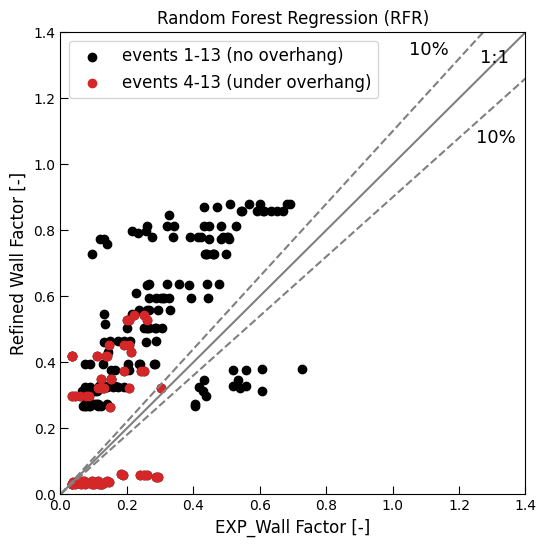

In [ ]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_VB, y_pred_VB, color='k', marker='o', label='events 1-13 (no overhang)')
# Create scatter plot
plt.scatter(y_VBO, y_pred_VBO, color=strong_orange, marker='o', label='events 4-13 (under overhang)')

# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("Random Forest Regression (RFR)", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

# Add legend
plt.legend(loc='upper left', fontsize=12)

plt.show()

##ML models metrics


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Flatten WF_EXP to 1D
y_VBO = y_VBO.flatten()

r2 = r2_score(y_VBO, y_pred_VBO)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_VBO, y_pred_VBO))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_VBO, y_pred_VBO)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_VBO, y_pred_VBO)
print(f"Mean Absolute Error (MAE): {mae}")




# Calculate individual errors
individual_errors = (np.abs(y_pred_VBO - y_VBO) / y_VBO) * 100
average_error = np.mean(individual_errors)

print("y_VBO (first 5):", y_VBO[:5])
print("y_pred_VBO (first 5):", y_pred_VBO[:5])
print("Individual Errors (first 5, %):", individual_errors[:5])
print(f"Average Error: {average_error:.2f}%")

R-squared (R²): -5.900667589158828
Root Mean Squared Error (RMSE): 0.20029887579018588
Mean Squared Error: 0.04011963964281231
Mean Absolute Error (MAE): 0.171037359275
y_VBO (first 5): [0.09 0.06 0.14 0.14 0.3 ]
y_pred_VBO (first 5): [0.03 0.3  0.04 0.42 0.32]
Individual Errors (first 5, %): [ 67.14 395.34  72.12 197.75   6.51]
Average Error: 163.24%


In [ ]:
import time


# Measure VB prediction time
prediction_time_VB = end_pred_VB - start_pred_VB

print(f"Prediction Time_VB: {prediction_time_VB:.5f} seconds")

Prediction Time_VB: 0.00367 seconds


##Import and plot EXP vs. CFD

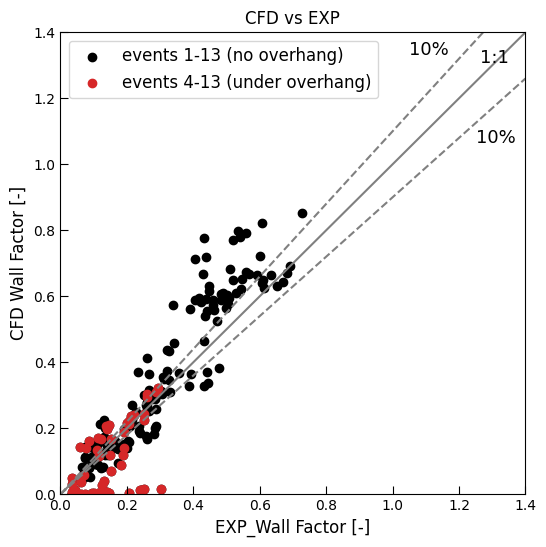

In [ ]:
dataset = pd.read_csv('VB_EXP_CFD_O.csv')
WF_EXP_O = dataset.iloc[:, :-1].values
WF_CFD_O = dataset.iloc[:, -1].values

dataset = pd.read_csv('VB_EXP_CFD.csv')
WF_EXP = dataset.iloc[:, :-1].values.flatten()
WF_CFD = dataset.iloc[:, -1].values

import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(WF_EXP, WF_CFD, color='k', marker='o', label='events 1-13 (no overhang)')
plt.scatter(WF_EXP_O, WF_CFD_O, color=strong_orange, marker='o', label='events 4-13 (under overhang)')


# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("CFD Wall Factor [-]", fontsize=12)
plt.title("CFD vs EXP", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

# Add legend
plt.legend(loc='upper left', fontsize=12)

plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#----------------------------------------------
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient (r)
r, _ = pearsonr(WF_EXP, WF_CFD)

# Compute R²
r_squared = r ** 2
print(f"R-squared (R²): {r_squared}")
#-----------------------------------------------


r2 = r2_score(WF_EXP[:17], WF_CFD[:17])
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(WF_EXP, WF_CFD))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(WF_EXP, WF_CFD)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(WF_EXP, WF_CFD)
print(f"Mean Absolute Error (MAE): {mae}")

###########################

# Calculate individual errors
individual_errors = (np.abs(WF_CFD - WF_EXP) / WF_EXP) * 100
average_error = np.mean(individual_errors)

print("WF_EXP (first 5):", WF_EXP[:17])
print("WF_CFD (first 5):", WF_CFD[:17])
print("Individual Errors (first 5, %):", individual_errors[:5])
print(f"Average Error: {average_error:.2f}%")



R-squared (R²): 0.8574589147508632
R-squared (R²): 0.4112738691871066
Root Mean Squared Error (RMSE): 0.09999784300788467
Mean Squared Error: 0.00999956860622955
Mean Absolute Error (MAE): 0.07250923849238579
WF_EXP (first 5): [0.6  0.32 0.15 0.43 0.32 0.24 0.56 0.12 0.56 0.26 0.54 0.34 0.21 0.73
 0.47 0.39 0.26]
WF_CFD (first 5): [0.72 0.44 0.13 0.67 0.37 0.21 0.67 0.21 0.79 0.27 0.8  0.46 0.27 0.85
 0.53 0.33 0.18]
Individual Errors (first 5, %): [20.42 35.59 13.44 55.73 16.06]
Average Error: 33.65%


## VB Wall Factor (WF) Contour

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load data
#data = np.loadtxt('Case01_U2.csv', delimiter=',', skiprows=1)
#wf = data[:, 10]  # Python uses 0-based indexing
#y = data[:, 7]
#x = data[:, 8]

dataset_plot = pd.read_csv('VB_plot.csv')
X_VB_plot = dataset_plot.iloc[:, :].values
y = dataset_plot.iloc[:, 0] * dataset_plot.iloc[:, 5]
x = dataset_plot.iloc[:, 1] * dataset_plot.iloc[:, 6]

y_pred_VB_plot = regressor.predict(X_VB_plot)
y_pred_VB_plot = y_pred_VB_plot.ravel()
print(x.shape, y.shape, y_pred_VB_plot.shape)

(10201,) (10201,) (10201,)


Interpolated values at (xx, yy):
[0.04 0.04 0.05 0.05 0.06 0.06 0.07 0.07 0.07 0.08 0.08 0.09 0.09 0.1
 0.1  0.11 0.11 0.12 0.12 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.14]


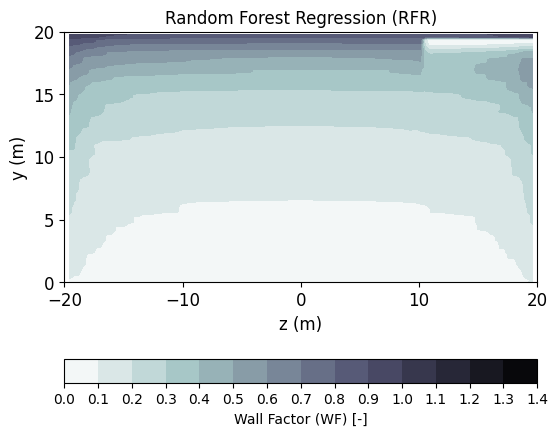

In [ ]:



# Create a grid of points for interpolation
X = np.linspace(min(x), max(x), 100)
Y = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(X, Y)

# Perform interpolation
wf_interp = griddata((x, y), y_pred_VB_plot, (X, Y), method='linear')

# Plotting
plt.figure(figsize=(6.1, 5))
contour_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
contour = plt.contourf(X, Y, wf_interp, levels=contour_levels, cmap=plt.cm.bone_r)
plt.colorbar(contour, orientation='horizontal', ticks=contour_levels, label='Wall Factor (WF) [-]', pad=0.2)
plt.xticks(np.arange(-20, 20.0001, 10), fontsize=12)
plt.yticks(np.arange(0, 20.1, 5), fontsize=12)


# Scatter plot
xx = np.zeros(29)
yy = np.array([0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.25, 8.5, 8.75, 9, 9.2, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10])



wf_mid = griddata((x, y), y_pred_VB_plot, (xx, yy), method='linear')

# Labels and title
plt.xlabel("z (m)", fontsize=12,)
plt.ylabel("y (m)", fontsize=12)
plt.title("Random Forest Regression (RFR)", fontsize=12)

# Print the interpolated values
print("Interpolated values at (xx, yy):")
print(wf_mid)


plt.show()
